# The Battle of Neighborhoods

### Table of Contents
#### 1. Analysis of Jinan
#### 2. Analysis of Qingdao - the same as Jinan
#### 3. Compare of Jinan and Qingdao

## 1. Analysis of Jinan

In [48]:
import requests
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
pd.set_option('max_row',1000)

In [49]:
# define a function to obtain geo from autonavi service
def geocodeG(address):
    par = {'address': address, 'key': 'ec2d0bdff8f9f6c0bd7ae8d9c062f37f'}
    base = 'http://restapi.amap.com/v3/geocode/geo'
    response = requests.get(base, par)
    answer = response.json()
    GPS=answer['geocodes'][0]['location'].split(",")
    return GPS[0],GPS[1]

In [50]:
# borough and neighborhoods information of Jinan
df_jinan = pd.read_csv('jinan.csv')
df_jinan.head()

,Borough,Neighborhood,Latitude,Longitude
0,济南市历下区,大明湖街道办事处,NaN,NaN
1,济南市历下区,千佛山街道办事处,NaN,NaN
2,济南市历下区,燕山街道办事处,NaN,NaN
3,济南市历下区,泉城路街道办事处,NaN,NaN
4,济南市历下区,趵突泉街道办事处,NaN,NaN


In [ ]:
# obtain the geo infomation of Jinan

for i in range(df_jinan.shape[0]):
    df_jinan.iloc[i,2] = geocodeG(df_jinan.iloc[i,0]+df_jinan.iloc[i,1])[1]
    df_jinan.iloc[i,3] = geocodeG(df_jinan.iloc[i,0]+df_jinan.iloc[i,1])[0]
df_jinan.to_csv('df_jinan_geo.csv',index='False',sep=',')

In [51]:
# directly read geo info from local csv file.
df_jinan = pd.read_csv('df_jinan_geo.csv')
df_jinan.head()

,Borough,Neighborhood,Latitude,Longitude
0,济南市历下区,大明湖街道办事处,36.669384,117.033020
1,济南市历下区,千佛山街道办事处,36.642861,117.040028
2,济南市历下区,燕山街道办事处,36.659474,117.062336
3,济南市历下区,泉城路街道办事处,36.666319,117.020375
4,济南市历下区,趵突泉街道办事处,36.659492,117.017884


In [6]:
# get the venues nearby of each neiborhoods

CLIENT_ID = 'IOV2GAGHT5QIZDIKYCJIBJTJUWP2QGO1EKICQVTC2NO1IALU' # your Foursquare ID
CLIENT_SECRET = 'ARNCSIMQGAQ0AIVPJTSTR0MWXBTV4MDHIHNOX0YTMUEYQUAP' # your Foursquare Secret
VERSION = '20181201' # Foursquare API version
LIMIT = 10000 #Venues count limit
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

jinan_venues = getNearbyVenues(names=df_jinan['Neighborhood'],
                                   latitudes=df_jinan['Latitude'],
                                   longitudes=df_jinan['Longitude']
                                  )

大明湖街道办事处
千佛山街道办事处
燕山街道办事处
泉城路街道办事处
趵突泉街道办事处
东关街道办事处
解放路街道办事处
建筑新村街道办事处
文化东路街道办事处
甸柳新村街道办事处
姚家街道办事处
智远街道办事处
龙洞街道办事处
舜华路街道办事处
泺源街道办事处
杆石桥街道办事处
魏家庄街道办事处
大观园街道办事处
四里村街道办事处
六里山街道办事处
七里山街道办事处
二七新村街道办事处
舜玉路街道办事处
舜耕街道办事处
王官庄街道办事处
七贤街道办事处
白马山街道办事处
十六里河街道办事处
兴隆街道办事处
党家街道办事处
陡沟街道办事处
西市场街道办事处
五里沟街道办事处
道德街街道办事处
营市街街道办事处
青年公园街道办事处
中大槐树街道办事处
振兴街街道办事处
南辛庄街道办事处
段店北路街道办事处
匡山街道办事处
张庄路街道办事处
美里湖街道办事处
兴福街道办事处
玉清湖街道办事处
腊山街道办事处
吴家堡街道办事处
无影山街道办事处
堤口路街道办事处
宝华街街道办事处
工人新村南村街道办事处
工人新村北村街道办事处
官扎营街道办事处
北坦街道办事处
天桥东街街道办事处
制锦市街道办事处
纬北路街道办事处
北园街道办事处
泺口街道办事处
药山街道办事处
大桥街道办事处
桑梓店街道办事处
洪家楼街道办事处
山大路街道办事处
东风街道办事处
全福街道办事处
孙村街道办事处
巨野河街道办事处
华山街道办事处
荷花路街道办事处
王舍人街道办事处
鲍山街道办事处
郭店街道办事处
唐冶街道办事处
港沟街道办事处
遥墙街道办事处
临港街道办事处
董家街道办事处
仲宫街道办事处
彩石街道办事处
柳埠街道办事处
唐王镇
西营镇
文昌街道办事处
平安街道办事处
崮云湖街道办事处
五峰山街道办事处
归德街道办事处
张夏街道办事处
万德街道办事处
孝里镇
马山镇
双泉镇
明水街道办事处
双山街道办事处
龙山街道办事处
枣园街道办事处
埠村街道办事处
圣井街道办事处
绣惠街道办事处
相公庄街道办事处
文祖街道办事处
普集街道办事处
官庄街道办事处
高官寨街道办事处
白云湖街道办事处
宁家埠街道办事处
曹范街道办事处
刁镇
垛庄镇
黄河镇
济阳街道办事处
济北街道办事处
回河街道办事处
孙耿街道办事处
太平街道办事处
崔寨街道办事处
曲堤镇
仁风镇
垛石镇
新市镇
榆山街道办事处
锦水街道

In [52]:
jinan_venues = pd.read_csv('jinan_venues.csv')
jinan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,大明湖街道办事处,36.669384,117.033020,Costa Coffee (咖世家),36.665376,117.024603,Coffee Shop
1,大明湖街道办事处,36.669384,117.033020,Shimao International Plaza (世茂国际广场),36.664762,117.023815,Shopping Mall
2,大明湖街道办事处,36.669384,117.033020,Carrefour (家乐福),36.666152,117.034345,Supermarket
3,大明湖街道办事处,36.669384,117.033020,家乐福（济南解放桥店）,36.669944,117.039006,Shopping Mall
4,千佛山街道办事处,36.642861,117.040028,Thousand Buddha Mountain (千佛山),36.642124,117.032448,Mountain


In [53]:
# one hot encoding
jinan_onehot = pd.get_dummies(jinan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
jinan_onehot['Neighborhood'] = jinan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [jinan_onehot.columns[-1]] + list(jinan_onehot.columns[:-1])
jinan_onehot = jinan_onehot[fixed_columns]
jinan_grouped = jinan_onehot.groupby('Neighborhood').mean().reset_index()
jinan_grouped.head()

,Neighborhood,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Basketball Stadium,Bed & Breakfast,Breakfast Spot,...,Supermarket,Sushi Restaurant,Toll Booth,Track,Trail,Train Station,Tunnel,Water Park,Women's Store,Xinjiang Restaurant
0,七贤街道办事处,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0
1,七里山街道办事处,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0
2,万德街道办事处,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0
3,东关街道办事处,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,0.0
4,东风街道办事处,0.0,0.111111,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.111111,0.0


In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = jinan_grouped['Neighborhood']

for ind in np.arange(jinan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jinan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,七贤街道办事处,Convenience Store,Clothing Store,Movie Theater,Fast Food Restaurant,Xinjiang Restaurant,German Restaurant,Flea Market,Food,Food Truck,Fruit & Vegetable Store
1,七里山街道办事处,Japanese Restaurant,Coffee Shop,Hotel,Clothing Store,Chinese Restaurant,Supermarket,Xinjiang Restaurant,German Restaurant,Food,Food Truck
2,万德街道办事处,Chinese Restaurant,Xinjiang Restaurant,Fast Food Restaurant,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,German Restaurant,Gourmet Shop
3,东关街道办事处,Jewelry Store,Train Station,Seafood Restaurant,Hotel,German Restaurant,Fishing Spot,Flea Market,Food,Food Truck,Fruit & Vegetable Store
4,东风街道办事处,Fruit & Vegetable Store,Women's Store,Asian Restaurant,BBQ Joint,Restaurant,Clothing Store,Chinese Restaurant,Shopping Mall,German Restaurant,Food


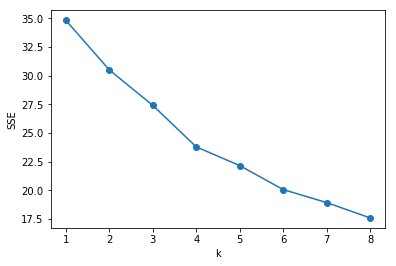

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
jinan_grouped_clustering = jinan_grouped.drop('Neighborhood', 1)
SSE = []
for k in range(1,9):
    estimator = KMeans(n_clusters=k,random_state=0)
    estimator.fit(jinan_grouped_clustering)
    SSE.append(estimator.inertia_)
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [56]:

# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(jinan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

jinan_merged = df_jinan

# merge jinan_grouped with jinan_data to add latitude/longitude for each neighborhood
jinan_merged = jinan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

jinan_merged = jinan_merged.dropna() # check the last columns!
jinan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,济南市历下区,大明湖街道办事处,36.669384,117.033020,2.0,Shopping Mall,Coffee Shop,Supermarket,Xinjiang Restaurant,German Restaurant,Fishing Spot,Flea Market,Food,Food Truck,Fruit & Vegetable Store
1,济南市历下区,千佛山街道办事处,36.642861,117.040028,2.0,Asian Restaurant,Chinese Restaurant,Mountain,Xinjiang Restaurant,Gourmet Shop,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store
2,济南市历下区,燕山街道办事处,36.659474,117.062336,2.0,Shandong Restaurant,Chinese Restaurant,Dongbei Restaurant,Korean Restaurant,Pool Hall,Bar,Massage Studio,Paper / Office Supplies Store,Furniture / Home Store,Flea Market
3,济南市历下区,泉城路街道办事处,36.666319,117.020375,2.0,Shopping Mall,Hotel,Coffee Shop,Plaza,Lake,Gourmet Shop,Movie Theater,Food Truck,Park,Electronics Store
4,济南市历下区,趵突泉街道办事处,36.659492,117.017884,2.0,Shopping Mall,Hotel,Coffee Shop,Plaza,Gourmet Shop,Movie Theater,Park,Electronics Store,Department Store,Restaurant


In [15]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

# create map
latitude = 36.38
longitude = 117.01
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

jinan_district_venues_count = pd.read_csv('jinan_district_venues_count.csv')

jinan_geo = r'jinan.json'

map_clusters.choropleth(
    geo_data=jinan_geo,
    data=jinan_district_venues_count,
    columns=['District','Count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='Venues Count in Jinan',
    reset=True
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# convert float to int
jinan_merged['Cluster Labels'] = jinan_merged['Cluster Labels'].astype(int)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jinan_merged['Latitude'], jinan_merged['Longitude'], jinan_merged['Neighborhood'], jinan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [58]:
jinan_merged.loc[jinan_merged['Cluster Labels'] == 0, jinan_merged.columns[[1] + list(range(5, jinan_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,段店北路街道办事处,Seafood Restaurant,Hotel,Xinjiang Restaurant,German Restaurant,Fishing Spot,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store
47,无影山街道办事处,Hotel,Bus Station,Market,Grocery Store,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,German Restaurant
49,宝华街街道办事处,Hotel,Fast Food Restaurant,Train Station,Gourmet Shop,Fishing Spot,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store
51,工人新村北村街道办事处,Fast Food Restaurant,Hotel,Gourmet Shop,Fishing Spot,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,German Restaurant
76,临港街道办事处,Hotel,Xinjiang Restaurant,Gourmet Shop,Fishing Spot,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,German Restaurant


In [59]:
jinan_merged.loc[jinan_merged['Cluster Labels'] == 1, jinan_merged.columns[[1] + list(range(5, jinan_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,王官庄街道办事处,Park,Xinjiang Restaurant,Japanese Restaurant,Fishing Spot,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,German Restaurant
53,北坦街道办事处,Park,Chinese Restaurant,Nature Preserve,Xinjiang Restaurant,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,German Restaurant
65,全福街道办事处,Market,Park,Chinese Restaurant,Xinjiang Restaurant,Gourmet Shop,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store
68,华山街道办事处,Park,Xinjiang Restaurant,Japanese Restaurant,Fishing Spot,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,German Restaurant
112,济北街道办事处,Mountain,Park,Toll Booth,Gourmet Shop,Fishing Spot,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store


In [60]:
jinan_merged.loc[jinan_merged['Cluster Labels'] == 2, jinan_merged.columns[[1] + list(range(5, jinan_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,大明湖街道办事处,Shopping Mall,Coffee Shop,Supermarket,Xinjiang Restaurant,German Restaurant,Fishing Spot,Flea Market,Food,Food Truck,Fruit & Vegetable Store
1,千佛山街道办事处,Asian Restaurant,Chinese Restaurant,Mountain,Xinjiang Restaurant,Gourmet Shop,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store
2,燕山街道办事处,Shandong Restaurant,Chinese Restaurant,Dongbei Restaurant,Korean Restaurant,Pool Hall,Bar,Massage Studio,Paper / Office Supplies Store,Furniture / Home Store,Flea Market
3,泉城路街道办事处,Shopping Mall,Hotel,Coffee Shop,Plaza,Lake,Gourmet Shop,Movie Theater,Food Truck,Park,Electronics Store
4,趵突泉街道办事处,Shopping Mall,Hotel,Coffee Shop,Plaza,Gourmet Shop,Movie Theater,Park,Electronics Store,Department Store,Restaurant


In [61]:
jinan_merged.loc[jinan_merged['Cluster Labels'] == 3, jinan_merged.columns[[1] + list(range(5, jinan_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,姚家街道办事处,Chinese Restaurant,Xinjiang Restaurant,Fast Food Restaurant,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,German Restaurant,Gourmet Shop
48,堤口路街道办事处,Chinese Restaurant,Xinjiang Restaurant,Fast Food Restaurant,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,German Restaurant,Gourmet Shop
58,泺口街道办事处,Chinese Restaurant,Hotel,Xinjiang Restaurant,Gourmet Shop,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,German Restaurant
59,药山街道办事处,Chinese Restaurant,Xinjiang Restaurant,Fast Food Restaurant,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,German Restaurant,Gourmet Shop
89,万德街道办事处,Chinese Restaurant,Xinjiang Restaurant,Fast Food Restaurant,Flea Market,Food,Food Truck,Fruit & Vegetable Store,Furniture / Home Store,German Restaurant,Gourmet Shop


## 2. Analysis of Qingdao - the same as Jinan

In [62]:
df_qingdao = pd.read_csv('df_qingdao_geo.csv')
df_qingdao.head()

,Borough,Neighborhood,Latitude,Longitude
0,青岛市市南区,八大峡街道办事处,36.056636,120.298179
1,青岛市市南区,云南路街道办事处,36.067401,120.305969
2,青岛市市南区,中山路街道办事处,36.065414,120.322654
3,青岛市市南区,八大关街道办事处,36.058097,120.350388
4,青岛市市南区,湛山路街道办事处,36.054171,120.362353


In [63]:
qingdao_venues = pd.read_csv('qingdao_venues.csv')
qingdao_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,八大峡街道办事处,36.056636,120.298179,船歌鱼水饺,36.054346,120.298572,Dumpling Restaurant
1,八大峡街道办事处,36.056636,120.298179,前海购物广场 Qianhai Shopping Center,36.057827,120.303856,Shopping Mall
2,八大峡街道办事处,36.056636,120.298179,友誼遊艇 Youyi Yacht,36.052653,120.301900,Harbor / Marina
3,八大峡街道办事处,36.056636,120.298179,飛洋遊艇碼頭 Feiyang Yacht,36.052678,120.302035,Harbor / Marina
4,八大峡街道办事处,36.056636,120.298179,中苑旅游码头,36.050800,120.299210,Pier


In [64]:
# one hot encoding
qingdao_onehot = pd.get_dummies(qingdao_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
qingdao_onehot['Neighborhood'] = qingdao_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [qingdao_onehot.columns[-1]] + list(qingdao_onehot.columns[:-1])
qingdao_onehot = qingdao_onehot[fixed_columns]
qingdao_grouped = qingdao_onehot.groupby('Neighborhood').mean().reset_index()
qingdao_grouped.head()

,Neighborhood,American Restaurant,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Garden,...,Skate Park,Spa,Sporting Goods Shop,Supermarket,Sushi Restaurant,Szechuan Restaurant,Toll Booth,Train Station,Turkish Restaurant,Watch Shop
0,三里河街道办事处,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,东阁街道办事处,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,中云街道办事处,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,中山路街道办事处,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0
4,中韩街道办事处,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0


In [65]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = qingdao_grouped['Neighborhood']

for ind in np.arange(qingdao_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(qingdao_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,三里河街道办事处,Hotel,Chinese Restaurant,Dumpling Restaurant,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Stand
1,东阁街道办事处,Pizza Place,Clothing Store,Diner,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court
2,中云街道办事处,Clothing Store,Bookstore,Coffee Shop,Watch Shop,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Stand
3,中山路街道办事处,Hostel,Café,Pier,Bookstore,History Museum,Historic Site,German Restaurant,Fast Food Restaurant,Park,Department Store
4,中韩街道办事处,Toll Booth,Watch Shop,Food Stand,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court


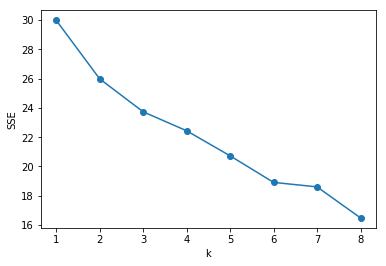

In [66]:
qingdao_grouped_clustering = qingdao_grouped.drop('Neighborhood', 1)
SSE = []
for k in range(1,9):
    estimator = KMeans(n_clusters=k,random_state=0)
    estimator.fit(qingdao_grouped_clustering)
    SSE.append(estimator.inertia_)
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [67]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(qingdao_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

qingdao_merged = df_qingdao

# merge qingdao_grouped with qingdao_data to add latitude/longitude for each neighborhood
qingdao_merged = qingdao_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

qingdao_merged = qingdao_merged.dropna() # check the last columns!
qingdao_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,青岛市市南区,八大峡街道办事处,36.056636,120.298179,2.0,Harbor / Marina,Pier,Shopping Plaza,Dumpling Restaurant,Plaza,Farmers Market,Shopping Mall,Grocery Store,German Restaurant,Food Stand
1,青岛市市南区,云南路街道办事处,36.067401,120.305969,2.0,Chinese Restaurant,Department Store,Market,Train Station,BBQ Joint,Beach,Metro Station,Church,Café,Fast Food Restaurant
2,青岛市市南区,中山路街道办事处,36.065414,120.322654,2.0,Hostel,Café,Pier,Bookstore,History Museum,Historic Site,German Restaurant,Fast Food Restaurant,Park,Department Store
3,青岛市市南区,八大关街道办事处,36.058097,120.350388,1.0,Hotel,Bar,Plaza,Scenic Lookout,Park,Historic Site,Harbor / Marina,Dumpling Restaurant,Electronics Store,History Museum
4,青岛市市南区,湛山路街道办事处,36.054171,120.362353,2.0,Shopping Mall,Hotel,Beach,Miscellaneous Shop,Chinese Restaurant,Café,Food Stand,Farmers Market,Fast Food Restaurant,Fish & Chips Shop


In [69]:
# create map
latitude = 36.5
longitude = 120.2
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
qingdao_district_venues_count = pd.read_csv('qingdao_district_venues_count.csv')

qingdao_geo = r'qingdao.json'

map_clusters.choropleth(
    geo_data=qingdao_geo,
    data=qingdao_district_venues_count,
    columns=['District','Count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='Venues Count in Qingdao',
    reset=True
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# convert float to int
qingdao_merged['Cluster Labels'] = qingdao_merged['Cluster Labels'].astype(int)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(qingdao_merged['Latitude'], qingdao_merged['Longitude'], qingdao_merged['Neighborhood'], qingdao_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [70]:
qingdao_merged.loc[qingdao_merged['Cluster Labels'] == 0, qingdao_merged.columns[[1] + list(range(5, qingdao_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
74,东阁街道办事处,Pizza Place,Clothing Store,Diner,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court
90,通济街道办事处,Clothing Store,Watch Shop,Dumpling Restaurant,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Stand
104,水集街道办事处,Hotel,Clothing Store,Dumpling Restaurant,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Stand
121,阜安街道办事处,Clothing Store,Watch Shop,Dumpling Restaurant,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Stand
122,中云街道办事处,Clothing Store,Bookstore,Coffee Shop,Watch Shop,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Stand


In [71]:
qingdao_merged.loc[qingdao_merged['Cluster Labels'] == 1, qingdao_merged.columns[[1] + list(range(5, qingdao_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,八大关街道办事处,Hotel,Bar,Plaza,Scenic Lookout,Park,Historic Site,Harbor / Marina,Dumpling Restaurant,Electronics Store,History Museum
9,江苏路街道办事处,Park,Hotel,Historic Site,German Restaurant,Watch Shop,Food & Drink Shop,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant
12,辽宁路街道办事处,Electronics Store,Boat or Ferry,Park,Historic Site,Food Court,History Museum,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
14,延安路街道办事处,Beer Garden,Shopping Mall,Museum,Resort,Brewery,Park,Gym,Fish & Chips Shop,Electronics Store,Historic Site
61,虎山路街道办事处,Park,Restaurant,Food Court,Dumpling Restaurant,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop


In [72]:
qingdao_merged.loc[qingdao_merged['Cluster Labels'] == 2, qingdao_merged.columns[[1] + list(range(5, qingdao_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,八大峡街道办事处,Harbor / Marina,Pier,Shopping Plaza,Dumpling Restaurant,Plaza,Farmers Market,Shopping Mall,Grocery Store,German Restaurant,Food Stand
1,云南路街道办事处,Chinese Restaurant,Department Store,Market,Train Station,BBQ Joint,Beach,Metro Station,Church,Café,Fast Food Restaurant
2,中山路街道办事处,Hostel,Café,Pier,Bookstore,History Museum,Historic Site,German Restaurant,Fast Food Restaurant,Park,Department Store
4,湛山路街道办事处,Shopping Mall,Hotel,Beach,Miscellaneous Shop,Chinese Restaurant,Café,Food Stand,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
5,香港中路街道办事处,Coffee Shop,Hotel,Italian Restaurant,Chinese Restaurant,Bookstore,Shopping Mall,Seafood Restaurant,American Restaurant,Turkish Restaurant,Ice Cream Shop


In [73]:
qingdao_merged.loc[qingdao_merged['Cluster Labels'] == 3, qingdao_merged.columns[[1] + list(range(5, qingdao_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,珠海街道办事处,Shandong Restaurant,Watch Shop,Diner,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court
69,沙子口街道办事处,Shandong Restaurant,Watch Shop,Diner,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court


In [74]:
qingdao_merged.loc[qingdao_merged['Cluster Labels'] == 4, qingdao_merged.columns[[1] + list(range(5, qingdao_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,珠海路街道办事处,Hotel,Nightclub,Coffee Shop,Chinese Restaurant,Leather Goods Store,Watch Shop,Food Court,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
19,四方街道办事处,Hotel,Turkish Restaurant,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Stand
38,辛安街道办事处,Hotel,Noodle House,Watch Shop,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court
39,红石崖街道办事处,Hotel,Turkish Restaurant,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Stand
60,九水街道办事处,Hotel,Turkish Restaurant,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Stand


In [75]:
qingdao_merged.loc[qingdao_merged['Cluster Labels'] == 5, qingdao_merged.columns[[1] + list(range(5, qingdao_merged.shape[1]))]].head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
108,滨河路街道办事处,Hotpot Restaurant,Hotel,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Stand
118,李权庄镇,Hotpot Restaurant,Hotel,Electronics Store,English Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Stand


## 3. Compare of Jinan and Qingdao

In [76]:
qingdao_venues = pd.read_csv('qingdao_venues.csv')
qingdao = pd.read_csv('qingdao.csv')
jinan_venues = pd.read_csv('jinan_venues.csv')
jinan = pd.read_csv('jinan.csv')
qingdao_venues_merge = pd.merge(qingdao,qingdao_venues,how='right')
qingdao_venues_merge = qingdao_venues_merge.drop(columns=['Latitude','Longitude'])
jinan_venues_merge = pd.merge(jinan,jinan_venues,how='right')
jinan_venues_merge = jinan_venues_merge.drop(columns=['Latitude','Longitude'])

In [77]:
qingdao_venues_merge.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,青岛市市南区,八大峡街道办事处,36.056636,120.298179,船歌鱼水饺,36.054346,120.298572,Dumpling Restaurant
1,青岛市市南区,八大峡街道办事处,36.056636,120.298179,前海购物广场 Qianhai Shopping Center,36.057827,120.303856,Shopping Mall
2,青岛市市南区,八大峡街道办事处,36.056636,120.298179,友誼遊艇 Youyi Yacht,36.052653,120.301900,Harbor / Marina
3,青岛市市南区,八大峡街道办事处,36.056636,120.298179,飛洋遊艇碼頭 Feiyang Yacht,36.052678,120.302035,Harbor / Marina
4,青岛市市南区,八大峡街道办事处,36.056636,120.298179,中苑旅游码头,36.050800,120.299210,Pier


In [78]:
jinan_venues_merge.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,济南市历下区,大明湖街道办事处,36.669384,117.033020,Costa Coffee (咖世家),36.665376,117.024603,Coffee Shop
1,济南市历下区,大明湖街道办事处,36.669384,117.033020,Shimao International Plaza (世茂国际广场),36.664762,117.023815,Shopping Mall
2,济南市历下区,大明湖街道办事处,36.669384,117.033020,Carrefour (家乐福),36.666152,117.034345,Supermarket
3,济南市历下区,大明湖街道办事处,36.669384,117.033020,家乐福（济南解放桥店）,36.669944,117.039006,Shopping Mall
4,济南市历下区,千佛山街道办事处,36.642861,117.040028,Thousand Buddha Mountain (千佛山),36.642124,117.032448,Mountain


In [79]:
# top 10 venues in Jinan and Qingdao
qingdao_venues_group = qingdao_venues_merge['Venue Category'].value_counts().to_frame('Count').reset_index()
qingdao_venues_group.columns = ['Category','Count']
jinan_venues_group = jinan_venues_merge['Venue Category'].value_counts().to_frame('Count').reset_index()
jinan_venues_group.columns = ['Category','Count']

In [80]:
qingdao_venues_group.head()

,Category,Count
0,Hotel,38
1,Chinese Restaurant,30
2,Shopping Mall,19
3,Coffee Shop,14
4,Fast Food Restaurant,13


In [81]:
jinan_venues_group.head()

,Category,Count
0,Hotel,63
1,Chinese Restaurant,36
2,Shopping Mall,32
3,Fast Food Restaurant,26
4,Park,25


In [82]:
qingdao_district_venues_count = qingdao_venues_merge['Borough'].value_counts().to_frame('Count').reset_index()
qingdao_district_venues_count.columns = ['District','Count']
jinan_district_venues_count = jinan_venues_merge['Borough'].value_counts().to_frame('Count').reset_index()
jinan_district_venues_count.columns = ['District','Count']
def replace_District_qingdao(District):
    District = District.replace('青岛市','')
    return(District)
def replace_District_jinan(District):
    District = District.replace('济南市','')
    return(District)
qingdao_district_venues_count['District'] = qingdao_district_venues_count['District'].apply(replace_District_qingdao)
jinan_district_venues_count['District'] = jinan_district_venues_count['District'].apply(replace_District_jinan)

qingdao_district_venues_count.to_csv('qingdao_district_venues_count.csv',sep=',',index=False)
jinan_district_venues_count.to_csv('jinan_district_venues_count.csv',sep=',',index=False)

In [83]:
qingdao_district_venues_count.head()

,District,Count
0,市南区,107
1,市北区,106
2,李沧区,18
3,黄岛区,15
4,城阳区,14


In [84]:
jinan_district_venues_count.head()

,District,Count
0,市中区,97
1,历下区,90
2,天桥区,66
3,槐荫区,62
4,莱芜区,60


In [85]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
trace_qingdao = go.Bar(
    x=qingdao_district_venues_count['Count'][::-1],
    y=qingdao_district_venues_count['District'][::-1],
    text=qingdao_district_venues_count['Count'][::-1],
    textposition='outside',
    name='Qingdao',
    orientation='h'
)
trace_jinan = go.Bar(
    x=jinan_district_venues_count['Count'][::-1],
    y=jinan_district_venues_count['District'][::-1],
    text=jinan_district_venues_count['Count'][::-1],
    textposition='outside',
    name='Jinan',
    orientation='h'
)
data = [trace_qingdao,trace_jinan]
layout = go.Layout(
    barmode='group',
    title = 'Venues Count in each Borough of Qingdao and Jinan'
)
fig = go.Figure(data=data,layout=layout)
plotly.offline.iplot(fig)

In [86]:
plotly.offline.iplot({
    'data':[go.Bar(x=qingdao_venues_group.head(10)['Category'],y=qingdao_venues_group.head(10)['Count'],text=qingdao_venues_group.head(10)['Count'],textposition='outside')],
    'layout':go.Layout(title='Top 10 Venues Caterory in Qingdao')
})

In [87]:
plotly.offline.iplot({
    'data':[go.Bar(x=jinan_venues_group.head(10)['Category'],y=jinan_venues_group.head(10)['Count'],text=jinan_venues_group.head(10)['Count'],textposition='outside',marker=dict(color='#FF7F0E'))],
    'layout':go.Layout(title='To 10 Venues Caterory in Jinan')
})